In [1]:
'''Usare l’API di WhiskyHunter per scaricare dati in formato JSON e analizzarli all’interno di un
Jupyter notebook
Ad esempio: quando è stata venduta la bottiglia più cara e a che prezzo? Quale marca?'''
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data_path = "WhiskyHunterData.json"
with open(data_path,newline='') as fd:
    reader = pd.read_json(fd)
    df = pd.DataFrame(reader)



Analizzo i dati di Whisky Hunter API guardando le info generali.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dt                       2226 non-null   object 
 1   winning_bid_max          2226 non-null   float64
 2   winning_bid_min          2226 non-null   float64
 3   winning_bid_mean         2226 non-null   float64
 4   auction_trading_volume   2226 non-null   float64
 5   auction_lots_count       2226 non-null   int64  
 6   all_auctions_lots_count  2226 non-null   int64  
 7   auction_name             2226 non-null   object 
 8   auction_slug             2226 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 156.6+ KB


Vedo un'analisi statistica descrittiva del dataframe

In [3]:
df.describe()

,winning_bid_max,winning_bid_min,winning_bid_mean,auction_trading_volume,auction_lots_count,all_auctions_lots_count
count,2.226000e+03,2226.000000,2226.000000,2.226000e+03,2226.000000,2226.000000
mean,2.552576e+04,65.954407,532.040090,5.070588e+05,1814.468553,31620.738544
std,8.067146e+04,2020.971299,2779.888677,7.703644e+05,2301.626815,16270.286741
min,5.500000e+01,0.000000,13.730000,4.200000e+02,1.000000,582.000000
25%,3.967300e+03,2.500000,168.310000,8.159146e+04,328.500000,16312.000000
50%,8.329000e+03,5.000000,226.620000,2.247535e+05,931.000000,36401.000000
75%,1.950000e+04,15.000000,312.202500,5.402808e+05,2260.500000,44324.000000
max,1.750000e+06,95000.000000,95000.000000,6.310810e+06,16274.000000,55890.000000


Controllo se ci sono elementi nan

In [4]:
df.isnull().sum()

dt                         0
winning_bid_max            0
winning_bid_min            0
winning_bid_mean           0
auction_trading_volume     0
auction_lots_count         0
all_auctions_lots_count    0
auction_name               0
auction_slug               0
dtype: int64

Non sono presenti elementi nan. 
Quando è stata venduta la bottiglia più cara?
Controllo la colonna winning_bid_max (massima offerta vincente)

In [29]:
date_max_winning_idx = df['winning_bid_max'].idxmax()
date_max_winning = df['dt'][date_max_winning_idx]

In [30]:
date_max_winning

'2023-11-01'

La bottiglia più cara è stata venduta in data: date_max
A che prezzo?

In [34]:
max_price = df['winning_bid_max'][date_max_winning_idx]

np.float64(1750000.0)

Quale marca?

In [36]:
auction_name_max = df['auction_name'][date_max_winning_idx]
auction_name_max

"Sotheby's Whisky Auction"

In [31]:
last_date_idx = df['dt'].idxmax()
first_date_idx =  df['dt'].idxmin()
last_date = df['dt'][last_date_idx]
first_date = df['dt'][first_date_idx]

In [32]:
last_date

'2025-01-01'

In [33]:
first_date

'2005-11-01'

Plot sui lotti contati per ogni asta

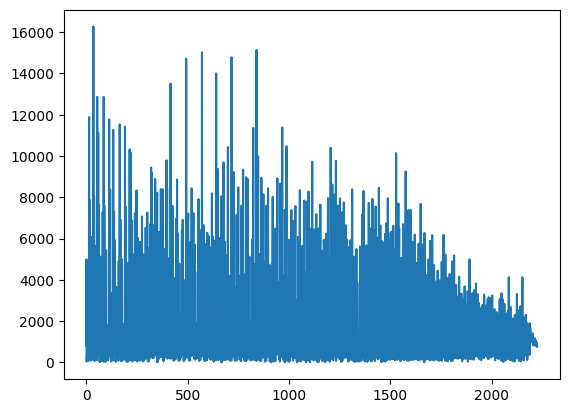

In [39]:
plt.plot(df['auction_lots_count'])
plt.show()

<Axes: xlabel='auction_lots_count', ylabel='Count'>

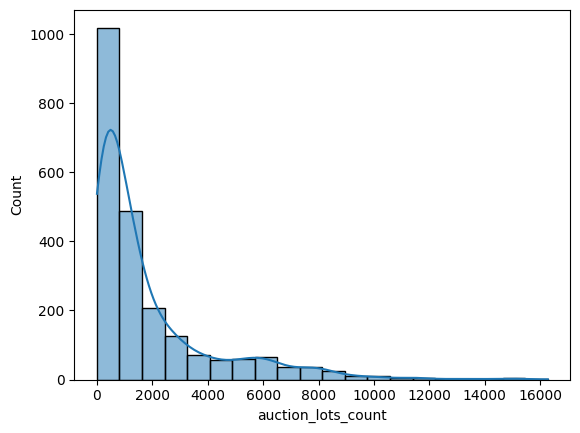

In [43]:
sns.histplot(df['auction_lots_count'],bins = 20, kde = True)